In [226]:
### Loading Libraries...
import pandas as pd
import numpy as np

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

### Some Scikit-learn utils
from sklearn.model_selection import train_test_split

### Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Models
from xgboost import XGBClassifier, plot_importance

import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score

import lime
from lime.lime_tabular import LimeTabularExplainer

import eli5
from eli5.sklearn import PermutationImportance

import shap
from shap import TreeExplainer,KernelExplainer,LinearExplainer
shap.initjs()


### Some cosmetics add-ons
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
conda install -c plotly plotly 


WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [246]:
data = pd.read_csv('/Users/odianosenakhibi/Downloads/Thesis/data/data.csv')

In [5]:
pip install PDPbox

Note: you may need to restart the kernel to use updated packages.


In [247]:
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [248]:
from pdpbox import pdp, info_plots #for partial plots

In [249]:
import seaborn as sns

In [250]:
from xgboost import XGBClassifier, plot_importance

In [251]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

In [252]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [253]:
# removing the last column as it is empty

data = data.drop(['id', 'Unnamed: 32'], axis = 1)

print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [254]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [255]:
data.isna().sum().sum()

0

In [256]:
# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [257]:
# 2 datasets
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

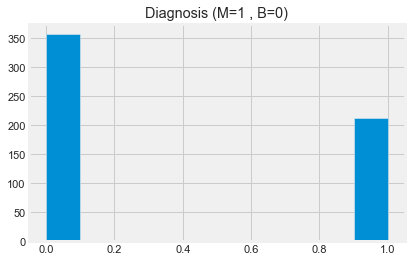

In [258]:
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [259]:
features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dataM=data[data['diagnosis'] ==1]
dataB=data[data['diagnosis'] ==0]

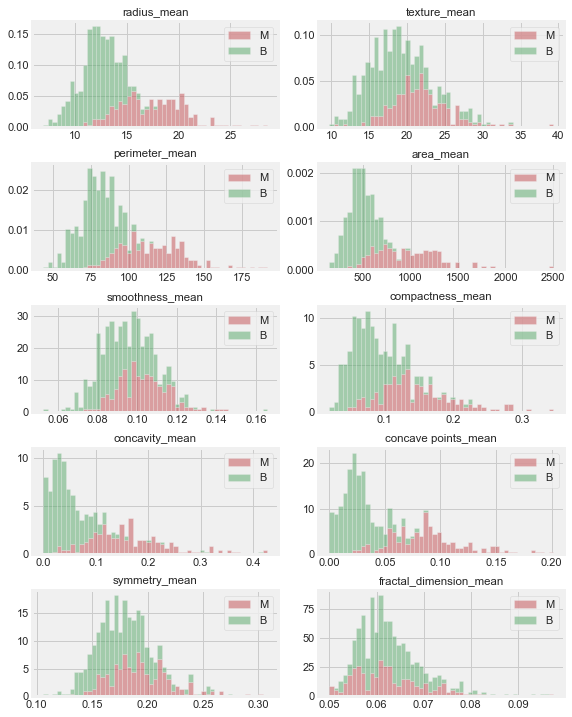

In [260]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [261]:
target = 'diagnosis'
features_list = list(data.columns)
features_list.remove(target)

In [262]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [263]:
# for visualizing correlations
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [265]:
cat_cols = list(data.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col])], axis=1)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [266]:
# building train/test datasets on a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((398, 31), (171, 31))

In [275]:
ML_models = {}
model_index = ['LR','RF','NN']
model_sklearn = [LogisticRegression(solver='liblinear',random_state=0),
                 RandomForestClassifier(n_estimators=100,random_state=0),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive',random_state=0)]
model_summary = []
for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted'),accuracy_score(y_test,preds),
                          roc_auc_score(y_test,model.predict_proba(X_test)[:,1])])
ML_models

{'LR': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
           tol=0.0001, verbose=0, warm_start=False),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=0, verbose=0, warm_start=False),
 'NN': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=True, epsilon=1e-08,
        hidden_layer_sizes=[100, 100, 100, 100, 100],
        learning_rate='adaptive', learning_rate_init=0.001, max_iter=200,
        momentum=0.9, n_iter_

In [276]:
model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy','AUC_ROC'])
model_summary = model_summary.reset_index()
display(model_summary)

index Name  F1_score  Accuracy   AUC_ROC
0      0   LR  1.000000  1.000000  1.000000
1      1   RF  1.000000  1.000000  1.000000
2      2   NN  0.927978  0.929825  0.990741

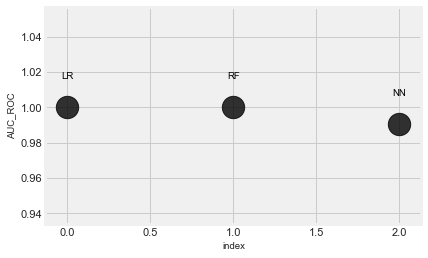

In [269]:
g=sns.regplot(data=model_summary, x="index", y="AUC_ROC", fit_reg=False,
               marker="o", color="black", scatter_kws={'s':500})
 
for i in range(0,model_summary.shape[0]):
     g.text(model_summary.loc[i,'index'], model_summary.loc[i,'AUC_ROC']+0.02, 
            model_summary.loc[i,'Name'], 
            horizontalalignment='center',verticalalignment='top', size='large', color='black')

In [278]:
#initialization of a explainer from LIME
explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 feature_names=X_train.columns,
                                 class_names=['Malign','Benign'])

In [279]:
exp = explainer.explain_instance(X_test.head(1).values[0],
                                 ML_models['LR'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True, show_all=True)


In [280]:
exp = explainer.explain_instance(X_test.head(1).values[0],
                                 ML_models['RF'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True, show_all=False)

In [281]:
exp = explainer.explain_instance(X_test.head(1).values[0],
                                 ML_models['NN'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True, show_all=False)


In [231]:
#Eli5
eli5.show_weights(ML_models['LR'], feature_names = list(X_test.columns))


In [277]:
eli5.show_prediction(ML_models['LR'], X_test.head(1).values[0],feature_names=list(X_test.columns))

In [233]:
exp = PermutationImportance(ML_models['LR'],
                            random_state = 0).fit(X_test, y_test)
eli5.show_weights(exp,feature_names=list(X_test.columns))


In [234]:
eli5.show_weights(ML_models['RF'],feature_names=list(X_test.columns))

In [235]:
eli5.show_prediction(ML_models['RF'], X_test.head(1).values[0],feature_names=list(X_test.columns))

In [236]:
exp = PermutationImportance(ML_models['RF'],
                            random_state = 0).fit(X_test, y_test)
eli5.show_weights(exp,feature_names=list(X_test.columns))

In [237]:
eli5.show_weights(ML_models['NN'])


In [238]:
#SHAP
explainer = LinearExplainer(ML_models['LR'], X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test.head(1).values)
shap.force_plot(explainer.expected_value,
                shap_values,
                X_test.head(1).values,
                feature_names=X_test.columns)

In [239]:
shap_values = explainer.shap_values(X_test.head(250).values)
shap.force_plot(explainer.expected_value,
                shap_values,
                X_test.head(250).values,
                feature_names=X_test.columns)

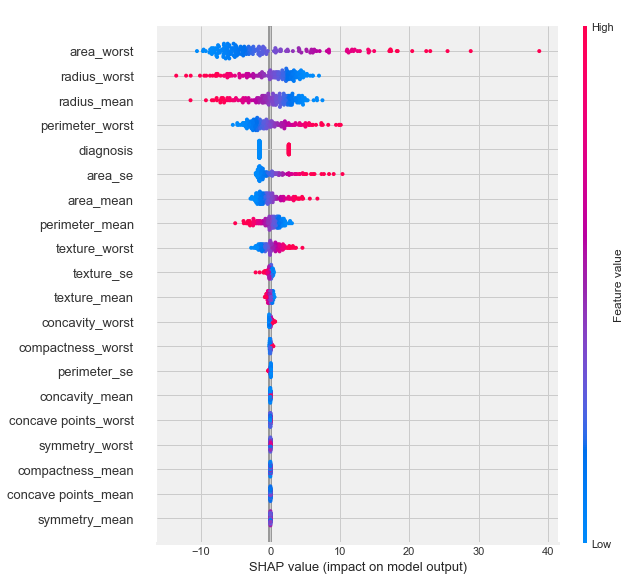

In [240]:
shap_values = explainer.shap_values(X_test.values)
spplot = shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns)

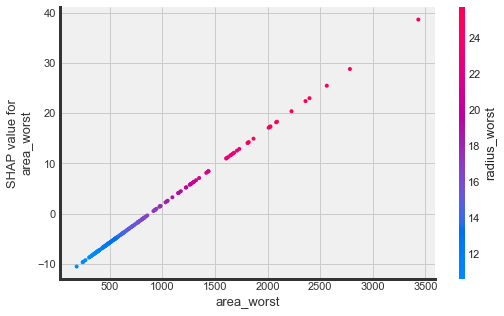

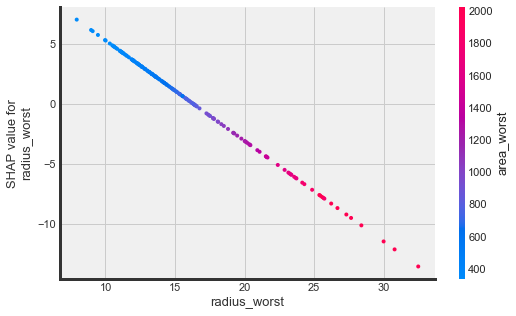

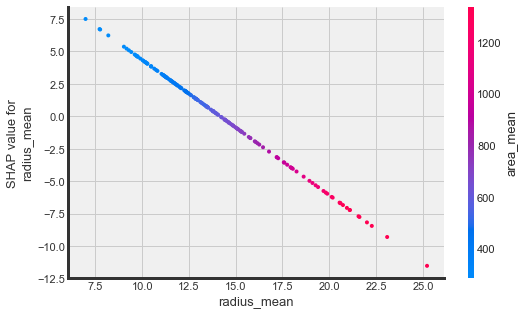

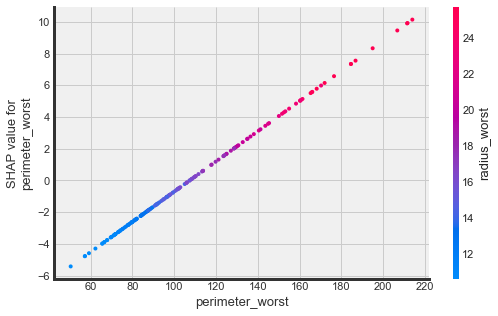

In [242]:
top4_cols = ['area_worst','radius_worst','radius_mean','perimeter_worst']
for col in top4_cols:
    shap.dependence_plot(col, shap_values, X_test)

In [243]:
explainer = TreeExplainer(ML_models['RF'])
shap_values = explainer.shap_values(X_test.head(1).values)
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test.head(1).values,
                feature_names=X_test.columns)

In [245]:
X_train_kmeans = shap.kmeans(X_train, 10)
explainer = KernelExplainer(ML_models['NN'].predict_proba,X_train_kmeans)
shap_values = explainer.shap_values(X_test.head(1).values)
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test.head(1).values,
                feature_names=X_test.columns)

100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
